**CNN PROJECT ON DOG AND CAT CLASSFICATION**

In this project, we will build and train a Convolutional Neural Network (CNN) to classify images of dogs and cats using TensorFlow and Keras. We will use the "Dogs vs Cats" dataset from Kaggle.



**Install and Configure Kaggle**


1.   First, we need to set up Kaggle to download the dataset.





In [ ]:
!pip install kaggle


**Importing Dataset From Kaggle Website**


In [ ]:
# Create the .kaggle folder
!mkdir -p ~/.kaggle

# Copy the kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Set the correct file permissions
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Download and Extract Dataset**




In [ ]:
#!/bin/bash
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 19.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

**Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

**Load and preprocess the dataset**

In [ ]:
#generators

train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize the datasets
def process(image, label):
    image = tf.cast(image / 255., tf.float32)  # Normalize images to [0, 1]
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

**Build the CNN Model**

In [ ]:
# Create the CNN model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Flatten the feature maps and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Changed from 123 to 128 for consistency
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)


**Compile and Train the Mode**l




In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.5665 - loss: 3.0121 - val_accuracy: 0.6688 - val_loss: 0.6547
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 88ms/step - accuracy: 0.6844 - loss: 0.6022 - val_accuracy: 0.7658 - val_loss: 0.4899
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.7416 - loss: 0.5400 - val_accuracy: 0.7752 - val_loss: 0.4764
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.7833 - loss: 0.4619 - val_accuracy: 0.7904 - val_loss: 0.4633
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.8197 - loss: 0.4036 - val_accuracy: 0.8266 - val_loss: 0.4027
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - accuracy: 0.8539 - loss: 0.3378 - val_accuracy: 0.8136 - val_loss: 0.4338
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.8783 - loss: 0.2802 - val_accuracy: 0.8216 - val_loss: 0.4441
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.9110 - loss: 0.2118 - 

In [ ]:
# Save the trained model to a file
model.save('/content/dog_cat_classifier.keras')


**Visualize Model Performance**

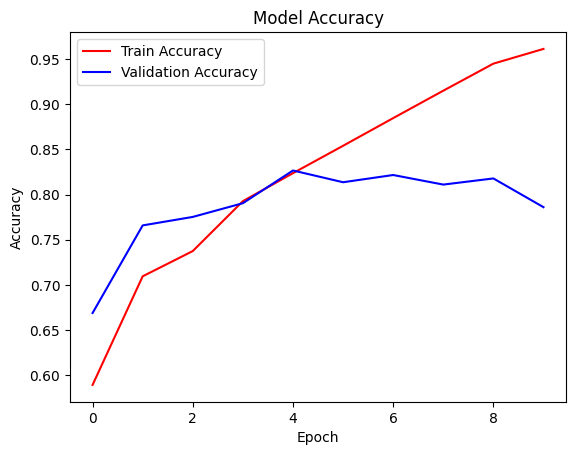

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

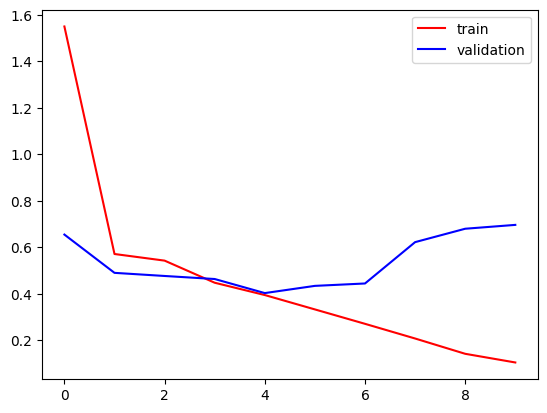

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

**Test the Model with a New Image**

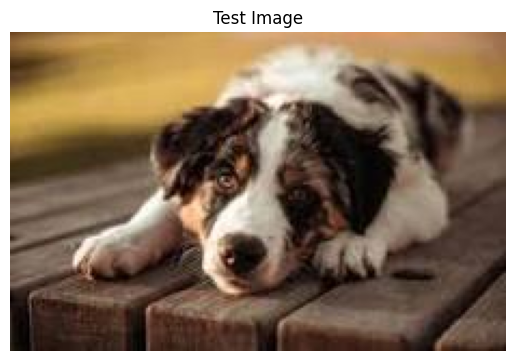

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The model predicts: Dog


In [ ]:
import numpy as np
import cv2
# Ensure the image is preprocessed correctly
test_img = cv2.imread('/content/dog1.jpg')  # Load the test image
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(test_img)
plt.axis('off')
plt.title("Test Image")
plt.show()

# Resize the image to match the model's input shape
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))  # Reshape to (1, 256, 256, 3)
test_input = test_input / 255.0  # Normalize the image to [0, 1]

# Predict using the trained model
prediction = model.predict(test_input)

# Output prediction
if prediction[0][0] > 0.5:
    print("The model predicts: Dog")
else:
    print("The model predicts: Cat")


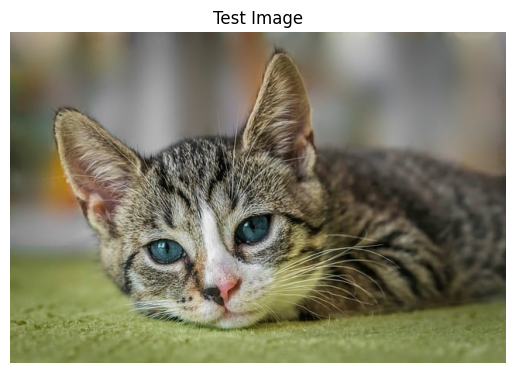

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
The model predicts: Cat 0.0032039997


In [6]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Specify the model path
model_path = '/content/dog_cat_classifier.keras'

# Check if the model file exists
if not os.path.exists(model_path):
    print(f"Error: Model file not found at {model_path}")
    exit()

# Load the saved model
model = load_model(model_path, compile=False)

# Path to the test image
test_img_path = '/content/cat1.jpg'

# Check if the test image file exists
if not os.path.exists(test_img_path):
    print(f"Error: Test image file not found at {test_img_path}")
    exit()

# Read the image
test_img = cv2.imread(test_img_path)

if test_img is None:
    print(f"Error: Unable to load image from path {test_img_path}")
    exit()
else:
    # Convert BGR to RGB for display
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(test_img_rgb)
    plt.axis('off')
    plt.title("Test Image")
    plt.show()

    # Resize the image to match the model's input shape
    target_size = (256, 256)  # Update this if your model expects a different size
    test_img_resized = cv2.resize(test_img, target_size)

    # Preprocess the image
    test_input = np.expand_dims(test_img_resized, axis=0)  # Add batch dimension
    test_input = test_input / 255.0  # Normalize the image to [0, 1]

    # Predict using the loaded model
    prediction = model.predict(test_input)

    # Output prediction
    if prediction[0][0] > 0.5:
        print("The model predicts: Dog",prediction[0][0])
    else:
        print("The model predicts: Cat",prediction[0][0])
